In [377]:
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt

In [393]:
log_files = glob('../checkpoints/test_*/_log.csv')

In [466]:
colors = {
    'asgd': 'darkred',
    'adadelta': 'red',
    'adagrad': 'orange',
    'adam': 'chocolate',
    'adamax': 'yellow',
    'lamb': 'lime',
    'rmsprop': 'seagreen',
    'sgd': 'teal',
    'rprop': 'purple'
}
def trim_all_columns(df):
    """
    Trim whitespace from ends of each value across all series in dataframe
    """
    trim_strings = lambda x: x.strip().lower() if isinstance(x, str) else x
    return df.applymap(trim_strings)

log_content = [pd.read_csv(log_file, header=None, names=['method', 'optimizer', 'n_epoch', 'epoch', 'error', 'psnr']) for log_file in log_files]
log_content = pd.concat(log_content)
log_content = trim_all_columns(log_content)
log_content.head()

,method,optimizer,n_epoch,epoch,error,psnr
0,carn,adadelta,50,1,0.240142,6.430511
1,carn,adadelta,50,2,0.209732,7.166917
2,carn,adadelta,50,3,0.168361,8.415480
3,carn,adadelta,50,4,0.116543,10.432514
4,carn,adadelta,50,5,0.067816,12.993714


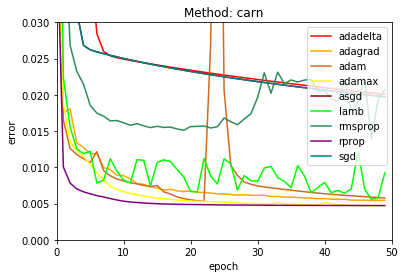

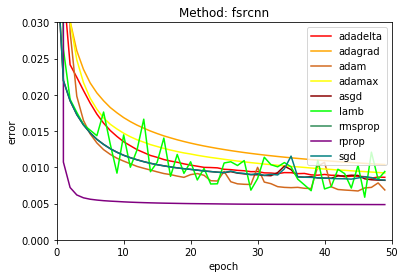

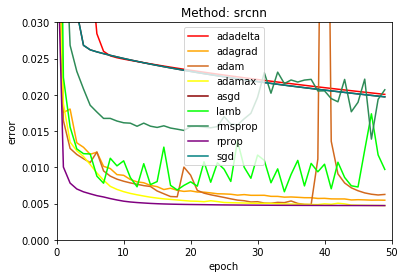

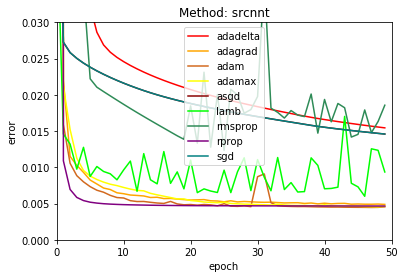

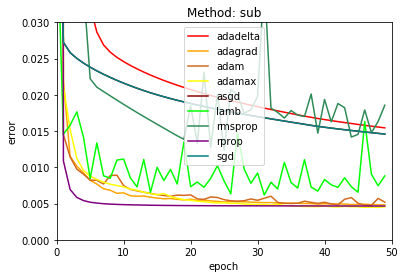

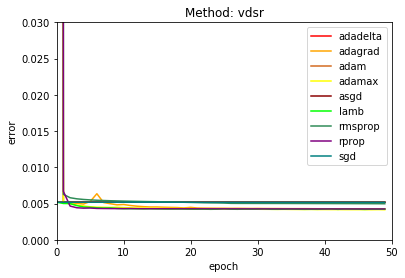

In [470]:
methods = log_content.groupby('method').size().to_frame('cnt').reset_index()
report = 'error'
for idm,row in methods.iterrows():
    method = row.method
    plt.xlabel('epoch')
    plt.ylabel(report)
    plt.title(f'Method: {method}')

    optimizer = log_content[log_content.method == row.method].groupby(['optimizer']).size().reset_index()
    for ido, rowo in optimizer.iterrows():
        selected_row = log_content[(log_content.method == row.method) & (log_content.optimizer == rowo.optimizer)]
        color        = colors[rowo.optimizer.strip()]
        plt.plot(selected_row[report], color)
        if report == 'error':
            plt.axis([0, 50, 0, 0.03])
#         if method == 'vdsr':
#             plt.axis([0, 50, 0.004, 0.065])
    plt.legend(labels=optimizer.optimizer)

    plt.show()

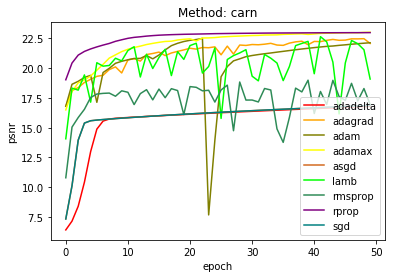

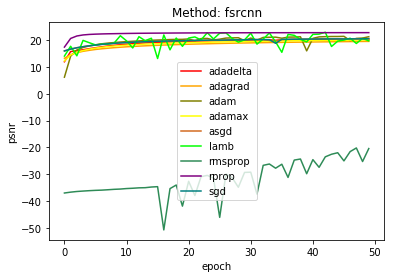

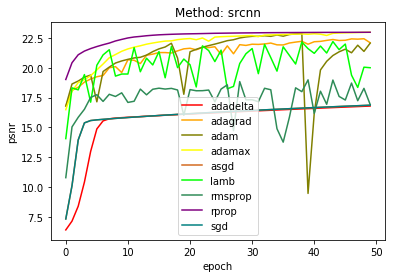

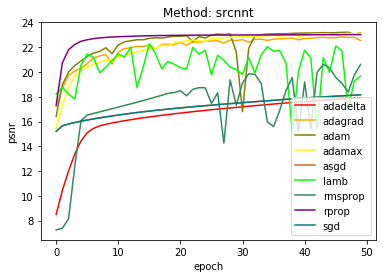

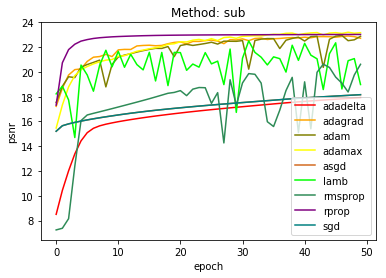

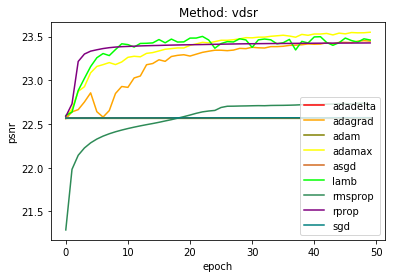

In [465]:
methods = log_content.groupby('method').size().to_frame('cnt').reset_index()
report = 'psnr'
for idm,row in methods.iterrows():
    method = row.method
    plt.xlabel('epoch')
    plt.ylabel(report)
    plt.title(f'Method: {method}')

    optimizer = log_content[log_content.method == row.method].groupby(['optimizer']).size().reset_index()
    for ido, rowo in optimizer.iterrows():
        selected_row = log_content[(log_content.method == row.method) & (log_content.optimizer == rowo.optimizer)]
        color        = colors[rowo.optimizer.strip()]
        plt.plot(selected_row[report], color)
    plt.legend(labels=optimizer.optimizer)

    plt.show()